In [1]:
#import logging
#import codecs
#import glob
#import logging
#import multiprocessing
import os
import pprint
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# More  document features


We will denote by

- $W= \{w_1, \dots, w_D\}$ the set of words used to make the representations.
- $X$ our corpus of documents.
- $X_w$ the set of documents that contain word $w$. 

### Bag of words vector  (or `tf` vector)


- The bag of words representation for a document $x$ given a vocabulary $W$, or the term frequency vector **$\text{tf}(X;W)$** is defined as 

$$
\text{tf}(x;W) = \left( \#\{w_1| w_1 \in x\}, \dots, \#\{w_D| w_D \in x\})\right)
$$



### Term frequency Inverse Document frequency ( `tf * idf`)

The objective of tf-idf representation is to emphasize the most relevant words of the documents. We want to emphasize:

- Words that appear **frequently in the document**: term frequency 
- Words that appear **rarely in the corpus**: inverse document frequency

#### Definition of the feature vectors


- The **$\text{tf}(X;W)$** vector for a document $x$ is defined as 

$$
\text{tf}(x;W) = \left( \#\{w_1| w_1 \in x\}, \dots, \#\{w_D| w_D \in x\})\right)
$$

- The **$\text{idf}(W; X)$** vector is defined as 

**$$\text{idf}(W; X) = \left( \text{idf}(w_1; X), \dots, \text{idf}(w_D; X)\right)$$** 
   
$\,\,\,\,\,\,\,$ A component of the feature for word $w \in W$ in the corpus $X$ is defined as 

$$
\text{idf}(w, X) = log\left(\frac{|X|}{1+|X_{w}|}\right)
$$

$\,\,\,\,\,\,\,$Which simply means the full vector is 
$$
\text{idf}(w, X) = \left( log\left(\frac{|X|}{1+|X_{w_1}|}\right), \dots, log\left(\frac{|X|}{1+|X_{w_D}|}\right) \right)
$$

- The tfidf vector for a document $x$ will be: $tf(x; X) * idf(X)$

#### Observations

- If a word appears in a few documents the idf vector will increase its weight.

- If a word appears in a lots of documents documents the idf vector will decrease its weight.

#### `sklearn.feature_extraction.text.TfidfVectorizer`

- Notice that the implementation in sklearn already prevents zero divisions by default. This happens if `smooth_idf=True`.

- By default the tfidf will only use words since `ngram_range=(1, 1)`. But this can be changed to allow n-grams in the feature vector components.

#### Example

Let us assume we have a corpus with one milion documents

- Consider a word appearping in 100 documents:

$$\log\left(\frac{1000.000}{1 + 100} \right) = 9.200$$

- Consider a word appearing in 100.000 documents

$$\log\left(\frac{1000.000}{1 + 100.000} \right) = 2.197$$



In [2]:
import scipy as sp

def build_vocabulary(corpus, splitter):
    """
    This function has to return X_w, a dict containing for each key, how
    many documents having that key are in our corpus.
    """
    vocabulary = {}
    X_w = dict()
    
    for document in corpus:
        words      = set(splitter.findall(document.lower()))
        # fill up vocabulary 
        
        # fill up X_w
        
    return vocabulary, X_w

def term_frequency(document, word_to_ind, splitter, 
                   normalize=True, word_inds=False):
    
    words = splitter.findall(document.lower())
    n_features = len(word_to_ind)
    tf = sp.sparse.lil_matrix( (1, n_features), dtype=float)
    
    word_indices = []
    for w in words:
        ## fill up word_indices
        
        ## fill up tf
        
    if word_inds:
        if normalize:
            return tf.multiply(1/sp.sparse.linalg.norm(tf))
        else:
            return tf
    else:
        if normalize:
            return tf.multiply(1/sp.sparse.linalg.norm(tf))
        else:
            return tf

IndentationError: expected an indented block (<ipython-input-2-554637a8d8ff>, line 33)

In [3]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [4]:
splitter = re.compile('(?u)\\b\\w\\w+\\b')
%time vocabulary, X_w = build_vocabulary(newsgroups_train.data, splitter)

word_to_ind = {v:i for i,v in enumerate(vocabulary)}
ind_to_word = {v:k for k,v in word_to_ind.items()}

CPU times: user 58.6 s, sys: 10.7 s, total: 1min 9s
Wall time: 1min 10s


In [5]:
%time tf = term_frequency(newsgroups_train.data[0],\
                          word_to_ind, splitter, word_inds=False)

CPU times: user 3.47 ms, sys: 803 µs, total: 4.27 ms
Wall time: 3.95 ms


## Verify that the term frequency is OK, compare with sklearn

In [9]:
tfidf_sk = sklearn.feature_extraction.text.TfidfVectorizer(use_idf=False,
                                                           smooth_idf=False, 
                                                           sublinear_tf=False)

%time tfidf_sk.fit(newsgroups_train.data)

inverse_vocabulary_ = {v: k for k, v in tfidf_sk.vocabulary_.items()}

CPU times: user 3.77 s, sys: 107 ms, total: 3.88 s
Wall time: 3.9 s


In [10]:
%time x_sk = tfidf_sk.transform([newsgroups_train.data[0]])

CPU times: user 2.2 ms, sys: 1.55 ms, total: 3.75 ms
Wall time: 10.1 ms


/Users/david/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [11]:
np.isclose(tf.sum(), x_sk.sum())

True

In [12]:
words_x_own = [ind_to_word[k] for k in tf.nonzero()[1]]
words_x_sk = [inverse_vocabulary_[k] for k in x_sk.nonzero()[1]]
set(words_x_own) == set(words_x_sk)

True

## Exercise: Generate tfidf and compare with sklearn 

Finish the `compute_idf` function

In [13]:
def compute_idf(X_w, word_to_ind, n_documents):

    n_features = len(word_to_ind)
    #idf = sp.sparse.csr_matrix( (1, n_features), dtype=float)
    idf = np.zeros([1, n_features])
    
    for w in X_w:
        # fill up idf
        pass
    
    #idf = idf + 1    
    return sp.sparse.csr_matrix(idf)

In [14]:
%%time 
# lil_matrix is more efficient.
tf = term_frequency(newsgroups_train.data[0], word_to_ind,\
                    splitter, normalize=False,word_inds=False)

idf = compute_idf(X_w,word_to_ind, len(newsgroups_train.data))

CPU times: user 299 ms, sys: 5.5 ms, total: 305 ms
Wall time: 305 ms


In [15]:
idf.max(), idf.min()

(9.640737377507692, 1.0)

In [16]:
n_documents = len(X_w)

In [17]:
tfidf = tf.multiply(idf)
tfidf = tfidf/sp.sparse.linalg.norm(tfidf)
sp.sparse.linalg.norm(tfidf)

1.0

In [18]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(newsgroups_train.data);

In [19]:
tfidf_sklearn = tfidf_vectorizer.transform(newsgroups_train.data[0:1])

/Users/david/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
tfidf.data.dtype, tfidf_sklearn.data.dtype

(dtype('float64'), dtype('float64'))

In [21]:
print(tfidf.sum(), tfidf_sklearn.sum())
print("\nsklearn tfidf and our tfidf are the same:",
      np.isclose(tfidf_sklearn.sum(),tfidf.sum()))

7.69781523302251 7.697815233022508

sklearn tfidf and our tfidf are the same: True


# tfidf in data 

Now we will use a dataframe containing text and use the tf-idf

In [22]:
people = pd.read_csv('people_wiki_small.csv')

In [23]:
people.head()

,Unnamed: 0,URI,name,text
0,0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [26]:
people.dtypes

Unnamed: 0     int64
URI           object
name          object
text          object
dtype: object

In [29]:
people["text"][3]

'franz rottensteiner born in waidmannsfeld lower austria austria on 18 january 1942 is an austrian publisher and critic in the fields of science fiction and the fantasticrottensteiner studied journalism english and history at the university of vienna receiving his doctorate in 1969 he served about fifteen years as librarian and editor at the sterreichisches institut fr bauforschung in vienna in addition he produced a number of translations into german of leading sf authors including herbert w franke stanislaw lem philip k dick kobo abe cordwainer smith brian w aldiss and the strugatski brothersin 1973 his new york anthology view from another shore of european science fiction introduced a number of continental authors to the englishreading public some of the authors in the work are stanislaw lem josef nesvadba gerard klein and jeanpierre andrevonthe year 1975 saw the start of his series die phantastischen romane for seven years it republished works of both lesser and betterknown writers

## Exercise: get_text_given_name

build a function  `get_text_given_name` that returns the text of a particular person from the data.

First try to think how can you select the text for Barack Obama...

In [31]:
obama = people[people['name'] == 'Barack Obama']

In [32]:
people[people['name'] == 'Barack Obama']["text"]

35817    barack hussein obama ii brk husen bm born augu...
Name: text, dtype: object

In [1]:
def get_text(df, boolean_series):
    row_df = df[boolean_series].text
    return df.loc[row_df.index[0]].text

def get_text_given_name(df, name):
    # TODO
    return text


This is what you would expect for Obama

In [37]:
get_text_given_name(people, "Barack Obama")

'barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campaign in 2007 and afte

#### End of the exercise

Now we will use the tfidf to get a representation of the vector containing the description of obama and Emma Watson

In [35]:
import sklearn
tfidf = sklearn.feature_extraction.text.TfidfVectorizer()

In [44]:
obama_vec, emma_vec = tfidf.fit_transform([get_text_given_name(people, "Barack Obama"), 
                                           get_text_given_name(people, "Emma Watson")])

/Users/david/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [45]:
%%time
X_tfidf = tfidf.fit_transform(people["text"])

/Users/david/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


CPU times: user 16.4 s, sys: 567 ms, total: 16.9 s
Wall time: 16.8 s


In [46]:
import numpy as np
import scipy as scp
from sklearn.metrics.pairwise import cosine_similarity

## Exercise:

Build the function `get_closest_k_names(tfidf_vec, X_tfidf, k=10)` that returns the names of the people associated to the text that is closer to the query text.

To do so, use the cosine_similarity

Try to find the closest names to:

```
"Brad Pitt"
"Angelina Jolie"
"Barack Obama"
"Bill Clinton"
"Emma Watson"
```

Do they make any sense? (You might want to check the wikipedia)

You will need to compute the tfidf for each individual in the list.

In [47]:
brad_pitt_tfidf = # fill in
angelina_tfidf  = # fill in
obama_tfidf     = # fill in
bill_tfidf      = # fill in
emma_tfidf      = # fill in

/Users/david/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [2]:
def get_closest_k_names(tfidf_vec, X_tfidf, k=10):
    # fill in 
    return 

In order to know if it is working you should get 

In [53]:
get_closest_k_names(emma_tfidf, X_tfidf, k=10)

29609         Bettina Devin
8504     Margaret C. Snyder
3633        Priyanka Chopra
26909      Pat Studdy-Clift
11666            Jane Fonda
34756          Maggie Smith
35902     Natashia Williams
8973           John Granger
17821         Emma Thompson
3115           Stuart Craig
Name: name, dtype: object

In [54]:
get_closest_k_names(bill_tfidf, X_tfidf, k=10)

19416         Donnie Fowler
11723           Howard Dean
37166    Richard L. Barclay
9517          Deval Patrick
28453            Jill Alper
35817          Barack Obama
2092     Richard Blumenthal
28447        George W. Bush
4096       Sheffield Nelson
25658           Dick Morris
Name: name, dtype: object

In [55]:
get_closest_k_names(angelina_tfidf, X_tfidf, k=10)

24263      Jessica Lange
11666         Jane Fonda
11156      Anne Hathaway
28076          Amy Adams
33529     Cate Blanchett
24426          Brad Pitt
21644       Jodie Foster
16242       Meryl Streep
34756       Maggie Smith
29009    Barbara Hershey
Name: name, dtype: object

# Exercise: Finding similar documents


Build a function `closest_point` that given a set of vectors `all_points`,a query vector `query_point` and a distance measure between vectors `dist` finds the vector from `all_points` that is the closest to `query_point`  (according to `dist`). Moreover, return also the distace between this closest point and and the query point.



In [65]:
def closest_point(all_points, query_point, dist):
    # FILL IN THIS
            
    return closest_point_, closest_distance_

def dist(x,y):
    return np.sqrt(np.linalg.norm((x-y)**2))

To check if your code is correct make the following plot. Is the blue point the closest point to the query point (red point) ?

In [66]:
%matplotlib inline

Query: [1 3]
Closest to query: [0 3]


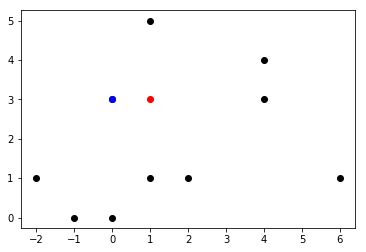

In [67]:

X = np.array([[1,1],[0,3],[4,3],[0,0],[1,5],[6,1],[-2,1],[4,4],[2,1],[-1,0]])
x_components = [x[0] for x in X]
y_components = [x[1] for x in X]
query = np.array([1,3])

closest_to_query, _ = closest_point(X, query, dist)
print("Query: {}\nClosest to query: {}".format(query,closest_to_query))
plt.scatter(x_components, y_components, color="black")
plt.scatter(query[0], query[1], color="red")
plt.scatter(closest_to_query[0], closest_to_query[1], color="blue", linewidths=1, marker="o")

## Exercise: Finding closest point in numpy

There is a efficient way to find the closest point to a query point using numpy.
Use the functions `np.argmin` and `np.argsort` in order to find the closest point to a query point.

In [73]:
import time

In [74]:
import sklearn
from sklearn import neighbors

n_features = 20
X = np.random.rand(10000000,n_features).astype(np.float32)
x = np.random.rand(1,n_features).astype(np.float32)

In [75]:
%time distances =  np.mean((X-x)**2,1)
#One second is too much
%time closest = np.argmin(np.mean((X-x)**2,1))
print("\nclosest row from x is {}".format(closest))

CPU times: user 1.03 s, sys: 405 ms, total: 1.44 s
Wall time: 1.21 s
CPU times: user 987 ms, sys: 360 ms, total: 1.35 s
Wall time: 1.1 s

closest row from x is 5245803


In [76]:
distances[closest]

0.013441379

In [77]:
np.argsort(distances)

array([5245803, 3507758, 9996929, ..., 1606706,  114629, 7864903])

In [78]:
s = time.time()
closest = np.argmin(np.mean((X-x)**2,1))
e = time.time()
numpy_time = abs(s-e)

## Custom function for closest point

The implementation will be slower (but this is due to python runetime!, if you would have coded it  it in C or cython it would be faster).

In [79]:
%%time
closest_point_, closest_distance_ = closest_point(X, x, dist)

CPU times: user 2min 5s, sys: 1.29 s, total: 2min 6s
Wall time: 2min 9s


## Use Kd tree

In the event that you want to build a system that needs to find similar points to a database of points, using a data structure for fast search is crucial. Now we will learn a little bit about a KD-Tree.

KD-trees are an efficient structure for efficiently representing our data. KD-trees provide an organization of our documents in terms of a certain partitioning of our space. The organization is based on recursively partitioning points into axis, defining "boxes".

The KD-tree structure is based on making aligned cuts and maintaining lists of points that fall into each one of these different bins. This structure allows us  efficiently prune our search space so that we do not have to visit every single data point, for every query, necessarily. Sometimes we will have to do it but hopefully, in many cases, we will not have to do it.


#### Using KD-trees

Let us see how KD-trees can aid in efficiently making NN search. Let us assume we are given a KD_tree and let us see how to ue it. Later on we will see how to build the tree.

Given a query point $\bf{x}$:

- Traverse the tree until the query point is reached. That is, check all the conditions of the KD-tree for the query point until a leave is reached.
    - Once the query point is found save the "box" where it is found.
    
    
- Compute the distance between each neighbor in the box and the query point.


- Record the smallest distance to the NN so far.


- Backtrack and try other branch at each node visited.
    - Use the distance bound and bounding box of each node to prune parts of the three that cannot include the nearest neighbor.
         
         That is, **if the smallest distance is less than the distance from the query point to the bounding box there is no need to compute the distance between any point in the bounding box to the query point**.

Let us build a KD-Tree using scikit-learn


In [80]:
%%time
tree = sklearn.neighbors.KDTree(X, leaf_size=1_000)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
%%time 
s = time.time()
distance_to_closest, closest_kdtree = tree.query(x, k=1)
e = time.time()
kdtree_time = abs(s-e)

In [ ]:
print("\nclosest row from x is {}".format(closest_kdtree[0][0]))

Do you noteice any difference? The bigger the dataset is the bigger the difference will be

In [229]:
print("Numpy time:", numpy_time)
print("Kdtree time:", kdtree_time)

Numpy time: 0.6174180507659912
Kdtree time: 0.2856941223144531


### building a kdtree with less leaves

Notice that in scikit-learn KD-trees have a parameter: 

leaf_size : positive integer (default = 40)

This is the number of points at which to switch to brute-force search. Changing leaf_size will not affect the results of a query, but can significantly impact the speed of a query and the memory required to store the constructed tree.

The amount of memory needed to store the tree scales as approximately `n_samples / leaf_size`. For a specified leaf_size, a leaf node is guaranteed to satisfy `leaf_size <= n_points <= 2 * leaf_size`, except in the case that `n_samples < leaf_size`.

## Exercise: Tunning KD-tree objects

- build different KDTrees with different leaf_size values (for example 10, and 100 and 1000). Do you see any speedup when making searches of a nearest neighbour?

- Inspect the parameter k. Try `tree.query(x,k=10)`. What do you get?

In [233]:
print("Numpy time:", numpy_time)
print("Kdtree(1000) time:", kdtree_time)
print("Kdtree(10)   time:", kdtree_time2)

Numpy time: 0.6174180507659912
Kdtree(1000) time: 0.2856941223144531
Kdtree(10)   time: 0.08020997047424316


We can use also the kd tree to get the k closest items to our query vector 

In [235]:
%time distances_to_closest, close_kdtree = tree.query(x,k=10)

CPU times: user 176 ms, sys: 1.18 ms, total: 177 ms
Wall time: 176 ms
